<a href="https://colab.research.google.com/github/Mariammmmmmm/modeling_labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%BF%D0%BE_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рстакян Мариам 

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()
spark

In [3]:
part0 = spark.read.parquet('part_0.parquet')
part0 = part0.dropna()
part1 = spark.read.parquet('part_1.parquet')
part1 = part1.dropna()
part2 = spark.read.parquet('part_2.parquet')
part2 = part2.dropna()
part3 = spark.read.parquet('part_3.parquet')
part3 = part3.dropna()
part4 = spark.read.parquet('part_4.parquet')
part4 = part4.dropna()
part0 = part0.union(part1).union(part2).union(part3).union(part4)
part0 = part0.dropna()
part0.show(5)

+------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
|app_id|               amnt|currency|operation_kind|card_type|operation_type|operation_type_group|ecommerce_flag|payment_system|income_flag|mcc|country|city|mcc_category|day_of_week|hour|days_before|weekofyear|hour_diff|transaction_number|__index_level_0__|
+------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
|     0| 0.4654254330729043|       1|             4|       98|             4|                   2|             3|             7|          3|  2|      1|  37|           2|          4|  19|        351|        34|       -1|      

In [4]:
part0.count()

27045150

In [5]:
part0.select("weekofyear").distinct().count()

53

In [6]:
part0_test = part0.filter("weekofyear > 26")
part0_test.count()

13560906

In [7]:
part0 = part0.filter("weekofyear < 27")
part0.count()

13484244

In [8]:
week_data_df = part0.groupBy("day_of_week","app_id").sum("amnt")
week_test_data_df = part0_test.groupBy("day_of_week","app_id").sum("amnt")
week_data_df.show(5)

+-----------+------+------------------+
|day_of_week|app_id|         sum(amnt)|
+-----------+------+------------------+
|          3|    22|15.988337767676331|
|          7|    55| 12.95319747448686|
|          3|    57| 5.266859471703497|
|          3|    89| 3.288576144876369|
|          6|   117| 5.598226486381129|
+-----------+------+------------------+
only showing top 5 rows



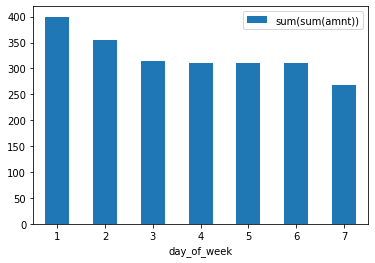

In [12]:
week_data_df_e = week_data_df.filter("app_id < 50")
week_data_df_e = week_data_df_e.groupBy("day_of_week").sum("sum(amnt)").sort("day_of_week")
import matplotlib.pyplot as plt
import pandas as pd
week_data_pandas_df = week_data_df_e.toPandas()
week_data_pandas_df.plot.bar(x='day_of_week', y='sum(sum(amnt))', rot=0)

In [13]:
pivot_week_df = week_data_df.groupBy('app_id').pivot('day_of_week').sum("sum(amnt)") 
pivot_week_test_df = week_test_data_df.groupBy('app_id').pivot('day_of_week').sum("sum(amnt)") 
pivot_week_df.show(5)

+------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|app_id|                 1|                  2|                 3|                4|                 5|                 6|                 7|
+------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|  5803| 7.415093444877591| 10.879662208704932| 9.516665672713453|4.803613142228442| 10.60093485790035| 6.982473740379343|  8.62078658322055|
|  7340|2.1451384096099497| 0.6687872823021035|0.6676765287205839|3.378023460184986| 2.186086385152351|3.2552689385365654|2.6463765744544916|
|  9852| 9.434118459993336|  8.675340799198322| 8.534768999657228|9.197816195632237|3.0647229521597126| 7.544113312353333| 7.948003960347545|
| 15727|13.094508255533814|   9.97099761587738|11.797227401401159|7.575353731932025| 8.207695482293195| 6.473612358167856| 11.58339205563029|
| 1897

In [14]:
pivot_week_df = pivot_week_df.na.fill(0)
pivot_week_test_df = pivot_week_test_df.na.fill(0)
pivot_week_df.show(5)

+------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|app_id|                 1|                  2|                 3|                4|                 5|                 6|                 7|
+------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|  5803| 7.415093444877591| 10.879662208704932| 9.516665672713453|4.803613142228442| 10.60093485790035| 6.982473740379343|  8.62078658322055|
|  7340|2.1451384096099497| 0.6687872823021035|0.6676765287205839|3.378023460184986| 2.186086385152351|3.2552689385365654|2.6463765744544916|
|  9852| 9.434118459993336|  8.675340799198322| 8.534768999657228|9.197816195632237|3.0647229521597126| 7.544113312353333| 7.948003960347545|
| 15727|13.094508255533814|   9.97099761587738|11.797227401401159|7.575353731932025| 8.207695482293195| 6.473612358167856| 11.58339205563029|
| 1897

In [15]:
cols = []
for i in range(6):
  a = str(i+1)
  cols.append(a)

По нейронным сетям предсказать тест по app_id предсказать 1-7 дни
ИЛИ по app_id и 1-6 дням предсказать 7 день и посчитать метрики

In [16]:
final_data_pandas = pivot_week_df.toPandas().loc[:, ['1','2','3','4','5','6','7']]
final_test_data_pandas = pivot_week_test_df.toPandas().loc[:, ['1','2','3','4','5','6','7']]
final_data_pandas.head()

,1,2,3,4,5,6,7
0,7.415093,10.879662,9.516666,4.803613,10.600935,6.982474,8.620787
1,2.145138,0.668787,0.667677,3.378023,2.186086,3.255269,2.646377
2,9.434118,8.675341,8.534769,9.197816,3.064723,7.544113,7.948004
3,13.094508,9.970998,11.797227,7.575354,8.207695,6.473612,11.583392
4,1.328090,0.202623,1.256944,1.655483,0.276079,1.335657,1.513284


In [17]:
x_train = final_data_pandas.loc[:, cols]
y_train = final_data_pandas.loc[:, ['7']]
x_test = final_test_data_pandas.loc[:, cols]
y_test = final_test_data_pandas.loc[:, ['7']]

In [18]:
import tensorflow as tf
import tensorflow as keras
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
y_train = tf.keras.utils.normalize(y_train, axis=1)
y_test = tf.keras.utils.normalize(y_test, axis=1)

In [19]:
import numpy as np
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
3451/3451 [==============================] - 14s 4ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 2/30
3451/3451 [==============================] - 9s 3ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 3/30
3451/3451 [==============================] - 11s 3ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 4/30
3451/3451 [==============================] - 11s 3ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 5/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 6/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 7/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 8/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 9/30
3451/3451 [==============================] - 9s 3ms/step - loss: 0.1378 - accuracy: 0.8622
Epoch 10/30
3451/3451 [==============================] - 9s 2ms/step - loss: 0.

In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

3444/3444 [==============================] - 5s 1ms/step - loss: 0.1182 - accuracy: 0.8818
0.11816490441560745 0.8818351030349731


------------------------------------------------------------------

In [21]:
hour_data_df = part0.groupBy("hour","app_id").sum("amnt")
hour_test_data_df = part0_test.groupBy("hour","app_id").sum("amnt")
hour_data_df.show(5)

+----+------+-------------------+
|hour|app_id|          sum(amnt)|
+----+------+-------------------+
|  15|    14| 1.6380639315790597|
|  15|    26|0.28153909926329146|
|  22|    53| 4.6036704225266645|
|   7|    55|0.40611973034197574|
|   6|   117| 0.8119283758004843|
+----+------+-------------------+
only showing top 5 rows



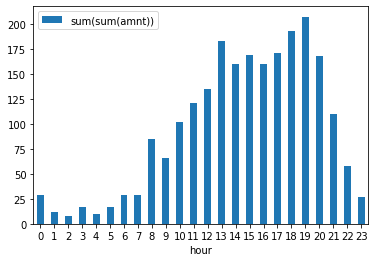

In [22]:
hour_data_df_e = hour_data_df.filter("app_id < 50")
hour_data_df_e = hour_data_df_e.groupBy("hour").sum("sum(amnt)").sort("hour")
import matplotlib.pyplot as plt
import pandas as pd
hour_data_pandas_df = hour_data_df_e.toPandas()
hour_data_pandas_df.plot.bar(x='hour', y='sum(sum(amnt))', rot=0)

In [24]:
pivot_hour_df = hour_data_df.groupBy('app_id').pivot('hour').sum("sum(amnt)") 
pivot_hour_test_df = hour_test_data_df.groupBy('app_id').pivot('hour').sum("sum(amnt)") 
pivot_hour_df.show(5)

+------+-------------------+------------------+-----------------+----+-------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|app_id|                  0|                 1|                2|   3|                  4|                 5|                6|                 7|                 8|                  9|                 10|                11|               12|                 13|                 14|                15|                 16|                17|                18|                19|                20|                21|                22|                23|
+------+-------------------+------------------+-----------------+----+-------------------+

In [25]:
pivot_hour_df = pivot_hour_df.na.fill(0)
pivot_hour_test_df = pivot_hour_test_df.na.fill(0)
pivot_hour_df.show(5)

+------+-------------------+------------------+-----------------+---+-------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|app_id|                  0|                 1|                2|  3|                  4|                 5|                6|                 7|                 8|                  9|                 10|                11|               12|                 13|                 14|                15|                 16|                17|                18|                19|                20|                21|                22|                23|
+------+-------------------+------------------+-----------------+---+-------------------+---

In [26]:
cols = []
for i in range(24):
  a = str(i)
  cols.append(a)

In [27]:
final_data_pandas = pivot_hour_df.toPandas().loc[:, cols]
final_test_data_pandas = pivot_hour_test_df.toPandas().loc[:, cols]
final_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.496626,0.000000,0.914725,0.0,0.433057,1.324231,4.868632,2.734160,3.421292,7.286055,...,3.801252,1.897374,1.959149,2.420227,1.276595,0.334927,0.000000,1.242478,0.565013,0.00000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.310611,0.765199,1.774062,2.035192,...,2.702849,1.566188,3.305524,0.000000,0.282057,0.257850,0.000000,0.000000,0.334116,0.00000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.456308,0.000000,...,0.891974,0.000000,0.457934,0.888355,0.814263,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.431890,0.806395,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.431890,...,0.337316,0.297779,0.646837,0.000000,0.531511,0.408432,0.000000,0.000000,0.857291,0.37517
4,0.544932,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.143062,...,0.000000,0.000000,0.000000,0.000000,2.104470,2.424782,0.444243,0.364390,0.000000,0.00000


In [28]:
cols = []
for i in range(23):
  a = str(i)
  cols.append(a)

In [29]:
x_train = final_data_pandas.loc[:, cols]
y_train = final_data_pandas.loc[:, ['23']]
x_test = final_test_data_pandas.loc[:, cols]
y_test = final_test_data_pandas.loc[:, ['23']]

In [30]:
import tensorflow as tf
import tensorflow as keras
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
y_train = tf.keras.utils.normalize(y_train, axis=1)
y_test = tf.keras.utils.normalize(y_test, axis=1)

In [31]:
import numpy as np
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
3451/3451 [==============================] - 8s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 2/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 3/30
3451/3451 [==============================] - 9s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 4/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 5/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 6/30
3451/3451 [==============================] - 8s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 7/30
3451/3451 [==============================] - 7s 2ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 8/30
3451/3451 [==============================] - 9s 3ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 9/30
3451/3451 [==============================] - 9s 3ms/step - loss: 0.6502 - accuracy: 0.3498
Epoch 10/30
3451/3451 [==============================] - 8s 2ms/step - loss: 0.650

In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

3444/3444 [==============================] - 5s 1ms/step - loss: 0.6475 - accuracy: 0.3525
0.6474747061729431 0.3525252938270569


--------------------------------------------------------------------------------